In [1]:
# coding: utf-8
__author__ = "Nicholas Metherall"
__copyright__ = "Copyright 2025, The Pacific Community (SPC)"
__license__ = "CreativeCommons"
__version__ = "0.1"
__email__ = "nicholasm@spc.int"
__status__ = "Development"

import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import numpy as np
from fiona.crs import from_epsg
import shapely
import warnings
from shapely.ops import unary_union
from shapely.geometry import box
warnings.filterwarnings('ignore')
# coastal ndti

<Axes: >

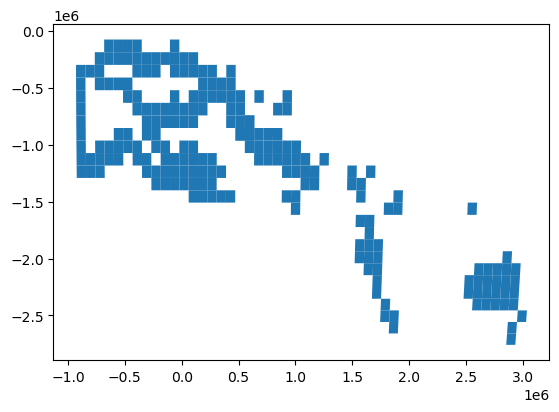

In [2]:
coastline_lines = gpd.read_file("coastline_lines.geojson")
coastal_grids = gpd.read_file("coastal_macblue_grids.geojson")
coastal_grids.plot()

In [3]:
coastal_grids

,level_1,GID_0,COUNTRY,index,uuid,index_right,geometry
0,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2853497.38 -2758834.497, 2860754.992..."
1,17,VUT,Vanuatu,2,VUT2,0,"POLYGON ((1820480.449 -2658691.923, 1824951.85..."
2,17,FJI,Fiji,3,FJI3,0,"POLYGON ((2860754.992 -2658691.923, 2867781.49..."
3,18,VUT,Vanuatu,4,VUT4,0,"POLYGON ((1744734.194 -2557719.247, 1748864.58..."
4,18,VUT,Vanuatu,5,VUT5,0,"POLYGON ((1824951.858 -2557719.247, 1829272.15..."
...,...,...,...,...,...,...,...
201,40,PNG,Papua New Guinea,225,PNG225,0,"POLYGON ((-681479.65 -185890.359, -681566.064 ..."
202,40,PNG,Papua New Guinea,226,PNG226,0,"POLYGON ((-598876.056 -185890.359, -598951.995..."
203,40,PNG,Papua New Guinea,227,PNG227,0,"POLYGON ((-516272.462 -185890.359, -516337.927..."
204,40,PNG,Papua New Guinea,228,PNG228,0,"POLYGON ((-433668.868 -185890.359, -433723.859..."


In [4]:
def sixteenth(grid): 
    minx, miny, maxx, maxy = grid.bounds
    midx = (minx + maxx) / 4
    midy = (miny + maxy) / 4
    # Return tuples of (geometry, sixteenth_name)
    return [
        (box(minx, midy, midx, maxy), 'Q1'),
        (box(midx, midy, maxx, maxy), 'Q2'),
        (box(minx, miny, midx, midy), 'Q3'),
        (box(midx, miny, maxx, midy), 'Q4'),
        (box(midx, midy, maxx, maxy), 'Q5'),
        (box(minx, miny, midx, midy), 'Q6'),
        (box(minx, miny, midx, midy), 'Q7'),
        (box(midx, miny, maxx, midy), 'Q8'),
        (box(minx, midy, midx, maxy), 'Q9'),
        (box(midx, midy, maxx, maxy), 'Q10'),
        (box(minx, miny, midx, midy), 'Q11'),
        (box(midx, miny, maxx, midy), 'Q12'),
        (box(midx, midy, maxx, maxy), 'Q13'),
        (box(minx, miny, midx, midy), 'Q14'),
        (box(minx, miny, midx, midy), 'Q15'),
        (box(midx, miny, maxx, midy), 'Q16'),    ]

# Build a list of dicts for each sub-square
records = []
for idx, row in coastal_grids.iterrows():
    for geom, sixteenth_name in sixteenth(row.geometry):
        rec = row.to_dict()
        rec['geometry'] = geom
        rec['sixteenth'] = sixteenth_name
        records.append(rec)

sixteenths_gdf = gpd.GeoDataFrame(records, crs=coastal_grids.crs)

In [5]:
sixteenths_gdf['quid'] = sixteenths_gdf['uuid']+sixteenths_gdf['sixteenth']+'_'+sixteenths_gdf['level_1'].astype(str)

In [6]:
sixteenths_gdf

,level_1,GID_0,COUNTRY,index,uuid,index_right,geometry,eighth,quid
0,16,FJI,Fiji,1,FJI1,0,"POLYGON ((1448568.373 -1354381.605, 1448568.37...",Q1,FJI1Q1_16
1,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2940776.111 -1354381.605, 2940776.11...",Q2,FJI1Q2_16
2,16,FJI,Fiji,1,FJI1,0,"POLYGON ((1448568.373 -2758834.497, 1448568.37...",Q3,FJI1Q3_16
3,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2940776.111 -2758834.497, 2940776.11...",Q4,FJI1Q4_16
4,16,FJI,Fiji,1,FJI1,0,"POLYGON ((2940776.111 -1354381.605, 2940776.11...",Q5,FJI1Q5_16
...,...,...,...,...,...,...,...,...,...
1643,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-20650.898 -185890.359, -20650.898 -...",Q4,PNG229Q4_40
1644,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-20650.898 -65064.137, -20650.898 -7...",Q5,PNG229Q5_40
1645,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-30979.621 -185890.359, -30979.621 -...",Q6,PNG229Q6_40
1646,40,PNG,Papua New Guinea,229,PNG229,0,"POLYGON ((-30979.621 -185890.359, -30979.621 -...",Q7,PNG229Q7_40


In [39]:
# Collect all new rows as dicts
records = []
for idx, row in sixteenths_gdf.iterrows():
    for geom, sixteenth_name in sixteenth(row.geometry):
        rec = row.to_dict()
        rec['geometry'] = geom
        rec['sixteenth'] = sixteenth_name  # Optional: label the sixteenth
        records.append(rec)

sixteenths_gdf = gpd.GeoDataFrame(records, crs=coastal_grids.crs)

<Axes: >

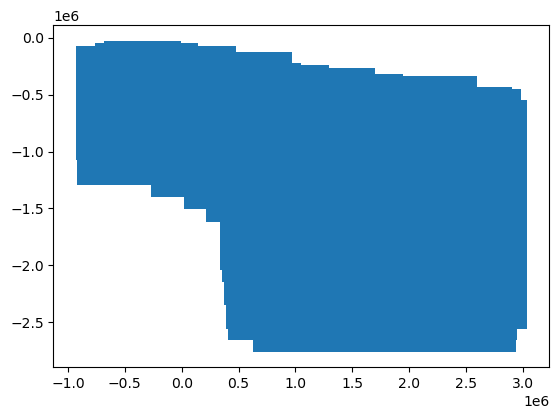

In [40]:
sixteenths_gdf.plot()

In [46]:
sixteenths_gdf

,level_1,GID_0,COUNTRY,index,uuid,geometry,eighth,quid,eigt
0,16,FJI,Fiji,1,FJI1,"POLYGON ((631021.203 -589412.497, 631021.203 -...",Q1,FJI1Q1_16,Q1
1,16,FJI,Fiji,1,FJI1,"POLYGON ((1448568.373 -589412.497, 1448568.373...",Q2,FJI1Q1_16,Q1
2,16,FJI,Fiji,1,FJI1,"POLYGON ((631021.203 -1354381.605, 631021.203 ...",Q3,FJI1Q1_16,Q1
3,16,FJI,Fiji,1,FJI1,"POLYGON ((1448568.373 -1354381.605, 1448568.37...",Q4,FJI1Q1_16,Q1
4,16,FJI,Fiji,1,FJI1,"POLYGON ((1448568.373 -589412.497, 1448568.373...",Q5,FJI1Q1_16,Q1
...,...,...,...,...,...,...,...,...,...
105467,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-12907.63 -185890.359, -12907.63 -62...",Q4,PNG229Q8_40,Q8
105468,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-12907.63 -62157.246, -12907.63 -627...",Q5,PNG229Q8_40,Q8
105469,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-8389.632 -185890.359, -8389.632 -62...",Q6,PNG229Q8_40,Q8
105470,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-8389.632 -185890.359, -8389.632 -62...",Q7,PNG229Q8_40,Q8


In [8]:
# Remove index_right if it exists
if 'index_right' in sixteenths_gdf.columns:
    sixteenths_gdf = sixteenths_gdf.drop(columns='index_right')

if 'index_right' in coastline_lines.columns:
    coastline_lines = coastline_lines.drop(columns='index_right')

<Axes: >

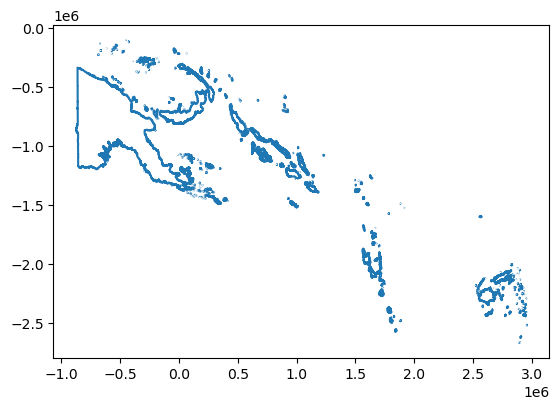

In [9]:
coastline_lines.plot()

In [10]:
# Only keep grids that intersect with any coastline
coastline_lines = gpd.read_file("coastline_lines.geojson")

subset = gpd.sjoin(sixteenths_gdf, coastline_lines, how="inner", predicate="intersects")


In [11]:
subset

,level_1,GID_0,COUNTRY,index,uuid,geometry,eighth,quid,index_right
0,16,FJI,Fiji,1,FJI1,"POLYGON ((1448568.373 -1354381.605, 1448568.37...",Q1,FJI1Q1_16,0
1,16,FJI,Fiji,1,FJI1,"POLYGON ((2940776.111 -1354381.605, 2940776.11...",Q2,FJI1Q2_16,0
2,16,FJI,Fiji,1,FJI1,"POLYGON ((1448568.373 -2758834.497, 1448568.37...",Q3,FJI1Q3_16,0
3,16,FJI,Fiji,1,FJI1,"POLYGON ((2940776.111 -2758834.497, 2940776.11...",Q4,FJI1Q4_16,0
4,16,FJI,Fiji,1,FJI1,"POLYGON ((2940776.111 -1354381.605, 2940776.11...",Q5,FJI1Q5_16,0
...,...,...,...,...,...,...,...,...,...
1642,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-30979.621 -185890.359, -30979.621 -...",Q3,PNG229Q3_40,0
1643,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-20650.898 -185890.359, -20650.898 -...",Q4,PNG229Q4_40,0
1645,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-30979.621 -185890.359, -30979.621 -...",Q6,PNG229Q6_40,0
1646,40,PNG,Papua New Guinea,229,PNG229,"POLYGON ((-30979.621 -185890.359, -30979.621 -...",Q7,PNG229Q7_40,0


<Axes: >

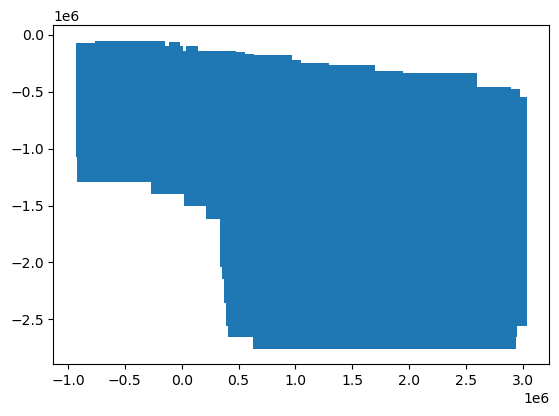

In [43]:
subset.plot()

In [35]:
sixteenth_grids = subset
sixteenth_grids.to_file("sixteenth_grids.geojson")
